# Analysing numpy.random package


This notebook contains information about numpy.random package, which is a part of the numpy package for Python, which is defined as the fundamental package for scientific computation in Python. 

The main purpose of numpy.random sub-package is to generate random numbers, which are very useful for many practical applications in mathematics, statistics, computation, finance and, in general, scientific computation models.

Although the above definition is quite straight-forward, there are many options included in this package, with the intention of covering many possible different specifications. Some features have been included in this package to manipulate and control the output and, thus, apply the most adecquate solutions for scientific analysis, facilitating this [otherwise mundane task.](https://hackaday.com/2009/05/26/dice-o-matic/)

However, an important advice needs to be taken in consideration upfront: despite the inmense help that this tools provide to scientific analysis, once we dive deeper into the documentation it is clearly stated that these random generation tools (and most of similar ones), are not trully random, but based on an internal __pseudorandom number generator (PRNG)__, which is essentially any algorithm for generating seemingly random but still reproducible data. The truth is that most random numbers used in computer programs are pseudo-random. The numbers are generated in a predictable way, because the algorithm is deterministic. Pseudo-random numbers are good enough for many purposes, but it may not be "true" random numbers.

Therefore, these tools should not be used for security purposes, such as password generation or encryption. There are specific tools in Python for that purpose, but those fall out of this investigation's scope.

This investigation will attempt to analyse these random number generation processes which are included in numpy.random and illustrate its main characteristics and differences through some practical examples.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Following this assignment's instructions, analysis will be divided into three separate sections:

1. __Use of the “Simple random data” and “Permutations” functions.__
2. __Use and purpose of five “Distributions” functions.__
3. __Use of seeds in generating pseudorandom numbers.__


## __1. Use of the "Simple random data" and "Permutations" functions.__

Under this denomination there are different functions, as listed in the [official documentation](https://docs.scipy.org/doc/numpy/reference/routines.random.html):
- rand(d0, d1, …, dn)
- randn(d0, d1, …, dn)
- randint(low[, high, size, dtype])
- random_integers(low[, high, size]) 
- random_sample([size])
- random([size])
- ranf([size])
- sample([size])
- choice(a[, size, replace, p])
- bytes(length): 

All these functions are quite similar, but there are some subtle differences that make one more suitable than the others depending on the particular circumstances or purposes for which they are used.

Basically, all of them provide an array of random values, which is a foundational principle of, for example, probability computation and experimental design. In fact, naming these tools as _sampling_ tools is not arbitrary. 

Sampling is the process through which estimations in a population (N) can be made by observing a fraction of that population, called _sample_ (_n_). In order for this sample to be representative of the population N, their _distribution_ needs to be alike.

Through this section we will use some of these sampling tools and try to show their differences and possible uses.

### Rand Function
```python
np.random.rand(d0, d1, …, dn)
```
***
As described on the documentation, rand function _"create(s) an array of the given shape and populate it with random samples from a uniform distribution over 0 and 1"._

Using DataFrames we can easilly see how this values are distributed. In this case, over 5,000 random samples it clearly shows an even distribution, having the same possibilities of obtaining any value in the range.

Thus, quartiles are roughly correspondant with the values. First quartile represents approximately 25% of the cases. Second quartile is 50%, and so on.

Adding a second random variable to the plot, we can observe this 2-dimensional distribution as completely random.

                 0
count  5000.000000
mean      0.503554
std       0.288510
min       0.000662
25%       0.255512
50%       0.505268
75%       0.751837
max       0.999627


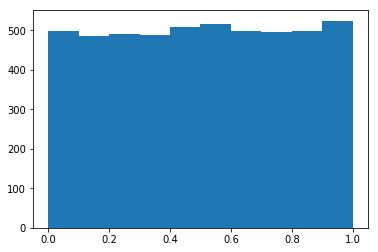

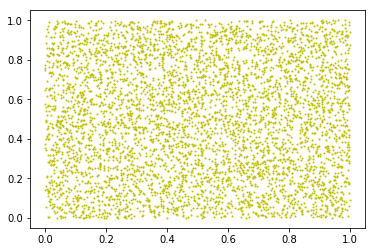

In [121]:
# Measures of central tendency with Panda Data Frames

x= np.random.rand(5000)
df = pd.DataFrame(x)
print (df.describe())

plt.hist(x)
plt.show()

# Plotting two random distributions (x,y)

y= np.random.rand(5000)

plt.plot(x,y,'y.', markersize=2)
plt.show()

### randn function
As the precedent, this function also provides an array with n random values, but in this case these values are within a range defined by a __Normal Standard distribution__, having mean=0 and Variance=1, as shown in the below table:

In [125]:
x= np.random.randn(5000)
df = pd.DataFrame(x)
print (df.describe())

                 0
count  5000.000000
mean      0.001868
std       1.001320
min      -3.177128
25%      -0.687123
50%       0.004807
75%       0.654894
max       4.239618


If we plot this vector generated by randn, we can easily see the resemblance with the typical Gaussian bell-shape function, with most of the values around the average (0):

(array([  4.,   2.,   5.,  11.,  13.,  21.,  29.,  28.,  47.,  66.,  75.,
         95., 133., 150., 174., 216., 227., 236., 263., 264., 302., 302.,
        290., 305., 273., 258., 216., 201., 159., 140.,  91.,  78.,  85.,
         65.,  51.,  40.,  24.,  23.,  19.,   8.,   4.,   3.,   1.,   0.,
          1.,   1.,   0.,   0.,   0.,   1.]),
 array([-3.17712775, -3.02879284, -2.88045792, -2.73212301, -2.5837881 ,
        -2.43545319, -2.28711828, -2.13878337, -1.99044846, -1.84211354,
        -1.69377863, -1.54544372, -1.39710881, -1.2487739 , -1.10043899,
        -0.95210407, -0.80376916, -0.65543425, -0.50709934, -0.35876443,
        -0.21042952, -0.06209461,  0.08624031,  0.23457522,  0.38291013,
         0.53124504,  0.67957995,  0.82791486,  0.97624977,  1.12458469,
         1.2729196 ,  1.42125451,  1.56958942,  1.71792433,  1.86625924,
         2.01459415,  2.16292907,  2.31126398,  2.45959889,  2.6079338 ,
         2.75626871,  2.90460362,  3.05293853,  3.20127345,  3.34960836,
 

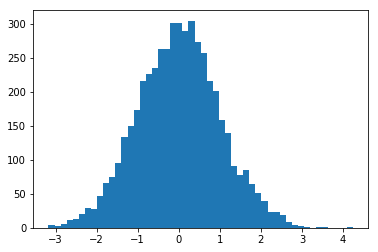

In [126]:
plt.hist(x, bins=50)

### randint function
In this case, random values obtained are integers in the specified interval, with the possibility to choose the the desired dtype of the output. Therefore, instead of a continous distribution, we are dealing with a discrete distribution, where values are finite. In the case below, this sample includes 5000 values between 0 and 9 (upper limit is not inclusive), but there are no values between any of the 10 members. For instance, a value will fall on 2 or 3, but never in between.

In a conyinous distribution, the probability of obtaining a specific value is nearly 0, although ypu can calculate the probability to obtain values above or below a specific value. On the other hand, discrete distributions allow to calculate the occurrence of a specific value. Sometimes, for practical and analytical reasons, continous distributions can be transformed into discrete ones, as in the histograms plot for the __rand__ function.

Some real-life examples of continous distributions can be time, distance or weight. And discrete variables can be years in your last bithday, number of kilometers and amount of kilograms. Note that the aforementioned variables can be either continous or discrete, depending on the precission of the measure and the purpose of the analysis.

Example of discrete variable: 

                 0
count  5000.000000
mean      4.484600
std       2.913256
min       0.000000
25%       2.000000
50%       4.000000
75%       7.000000
max       9.000000


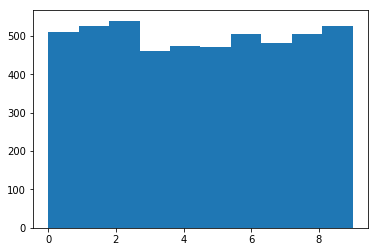

In [5]:
x=np.random.randint(0,10,5000)
plt.hist(x)
df = pd.DataFrame(x)
print (df.describe())

### sample, random_sample, random & ranf functions
These four are aliases for the same function, and can be used indiscriminately.

Returns an array of random float values between 0 and 1 (not inclusive) from the continuous uniform distribution, where all outcomes in a range between a minimum and maximum value are equally likely.

This distribution is used in statistics. A sample from this distribution (between zero and one) can be used to generate random samples from other distributions (by inversion of the cumulative form of the  distribution).

In [6]:
a= np.random.random_sample(10)
b= np.random.sample(10)
c= np.random.random(10)
d= np.random.ranf(10)
print (a, b, c, d)


[0.7350376  0.27386472 0.05538036 0.60388904 0.1323906  0.24388539
 0.2874319  0.27337326 0.36948249 0.13270261] [0.30360763 0.52371903 0.47101126 0.87600728 0.15382741 0.71768403
 0.60719681 0.53529476 0.38826729 0.150548  ] [0.41951772 0.04235919 0.2150298  0.67791311 0.94549163 0.43175398
 0.93733187 0.31357429 0.21762647 0.37813355] [0.10485681 0.43831222 0.93997479 0.88280548 0.75981057 0.83462789
 0.83787495 0.33234671 0.6229926  0.22938906]


### byte function
As explained in the first section, this package aims to facilitate tasks for analysis. This particular function is also providing random results, but in this case the only input is the length of the results and the output returns __bytes__.

In [238]:
np.random.bytes(1)

b'\x9d'

### choice function

This function, instead of generating an array of random values within a range, takes an array as input and randomly selects among its members. 

By default, uniform distribution is used to make the selection, but probailities can be specified with the parameter _p_.

The main difference with other similar functions is the fact that results might be generated for a non-uniform distribution by modifying the _p_ value:

In [128]:
unif=np.random.choice(4,10) #Uniform distribution: 2 random values from 0 to 3. 
print(unif)#The same result is obtained with np.random.ranint(0,4,2)

nonun=np.random.choice(4,10,p=[0.1,0.1,0.1,0.7]) #Probability of obtaining '3' is 7 times more likely
print(nonun)


[0 3 0 2 2 3 3 3 0 3]
[0 3 1 3 3 3 3 3 3 3]


Additionally, a replacement parameter can be switched off, preventing the function to select a previously selected value in the input array. However, this is also activated by default when using ___random.sample___ function This feature is quite useful for Combinatorics operations.

As defined by Wolfram MathWorld:
> _Combinatorics is the branch of mathematics studying the enumeration, combination, and permutation of sets of elements and the mathematical relations that characterize their properties._ 

Basically, the two main components in combinatronics are __combinations__ and __permutations__. 

__Combinations__ are the possible outputs when taking _r_ elements from a pool of _n_ elements. 

$$nCr = \frac{n!}{r!(n-r)!}$$

This elements can be replaced after every extraction or not. This is especially useful when using categorical variables, such as an array composed by unique, non-countable values, in the form of strings:

In [231]:
# Superhero/villain generator. Try different random combinations!
a = np.random.choice(['Amazing','Mighty', 'Lousy', 'Hectic', 'Healthy','Politically Incorrect'])
b = np.random.choice(['Blue', 'Flying', 'Magenta', 'Transparent','Left-handed'])
c = np.random.choice(['Cucumber', 'Teddy Bear', 'Postman', 'Wizard','Worm','Siameses','Dolphin','Crab'])
d = np.random.choice(['the Moon','Galway', 'Hell', 'Mars', 'the Future','the Past'])
print("Behold the",a,b,c,"from",d,"!")

Behold the Mighty Blue Teddy Bear from Hell !


Permutations are similar, but in this case the __order__ in which those _n_ elements are selected is also taken in consideration. Basically, we can define permutations as _n_ distinct objects taken _r_ at a time. 

There are two types of permutation:

- __Permutations with repetitions__: such as lottery numbers, which can have the same number repeated.
> In this example, _n_ are all digits from 0 to 9 and _r_ is 5 (length of a lottery number).To calculate all the possible arrangements in which _n_ elements can be displayed we can just multiply _n_ by itself _r_ times.$$n^r$$
>> 10 (_n_) elements multiplied by itself 5 (_r_) times = 100,000 possible combinations.
- __No Repetition__: for example the first three people in a running race. You can't be first and second.
> _n_ is the total number of participants in the race and _r_ are the three first runners. 
>The calculation is denoted by  $$nPr =\frac{n!}{(n - r)!}$$ 
>> Given that there are 500 runners participating in this race, the possible combinations in which three different runners can finish first, second an third are 500!/(500-3)!=500!/497!. This is equivalent to 500 X 499 X 498 = 124,251,000 different ways in which the different runners could finish in the podium.

No wonder why we are always encouraged to create long passwords. With any new character added to our passwors we are multiplying the possible outcomes and, therefore, making more difficult for scammers to crack our passwords by trial-error method. Especially because scammers are also using computational tools than can try millions of different combinations in seconds. A small study about this can be found in [this link](https://math.stackexchange.com/questions/739874/how-many-possible-combinations-in-8-character-password)

In [4]:
#Lottery (5 numbers length) 
lotto=10**5
print (lotto)
#Possible arrangements for three runners in the first places in a 500 participants race:
race=500*499*498
print (race)

100000
124251000


There are two functions included in the random package that deal with permutations:
- shuffle(x)
    Modify a sequence in-place by shuffling its contents.

    This function only shuffles the array along the first axis of a multi-dimensional array. The order of sub-arrays is changed but their contents remains the same.


- permutations(x)
    Randomly permute a sequence, or return a permuted range.

    If x is a multi-dimensional array, it is only shuffled along its first index.

Thus, these two functions are doing basically the same operation. However, np.random.permutation has two differences from np.random.shuffle:

    if passed an array, it will return a shuffled copy of the array; np.random.shuffle shuffles the array inplace
    if passed an integer, it will return a shuffled range i.e. np.random.shuffle(np.arange(n))
    
   Taken from [this StackOverflow entry](https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy#15474335)

In [61]:
# Creating a list from 0 to 9
c=np.arange(10)
print ("Numbers in order: ",c)
# Shuffling the above list
np.random.shuffle(c)
print ("Numbers shuffled: ",c)
# Creating a permutation of a list from 0 to 9
d=np.random.permutation(10)
print ("numbers permuted: ",d)

Numbers in order:  [0 1 2 3 4 5 6 7 8 9]
Numbers shuffled:  [8 2 7 0 5 9 4 1 3 6]
numbers permuted:  [0 2 5 9 1 7 3 4 8 6]


## __2. Use and purpose of five “Distributions” functions.__

Until now we have named two different distributions when investigating random functions in NumPy: linear continous distribution and standard normal distribution. We have also specified some differences between continous and discrete distributions. But before proceeding, we need some deeper understanding about probability distributions. We will use Stat Trek's definition, as seen [here](https://stattrek.com/probability-distributions/discrete-continuous.aspx?tutorial=prob).

>All probability distributions can be classified as __discrete__ probability distributions or as __continuous__ probability distributions, depending on whether they define probabilities associated with discrete variables or continuous variables (as seen in the Superhero/villain generator).

>If a random variable is a discrete variable, its probability distribution is called a discrete probability distribution. With a discrete probability distribution, each possible value of the discrete random variable can be associated with a non-zero probability. Thus, a discrete probability distribution can always be presented in tabular form.

>If a random variable is a continuous variable, its probability distribution is called a continuous probability distribution. A continuous probability distribution differs from a discrete probability distribution in several ways.
- The probability that a continuous random variable will assume a particular value is zero.
- As a result, a continuous probability distribution cannot be expressed in tabular form.
- Instead, an equation or formula is used to describe a continuous probability distribution.

>Most often, the equation used to describe a continuous probability distribution is called a __probability density function (PDF)__. For a continuous probability distribution, the density function has the following properties:
- Since the continuous random variable is defined over a continuous range of values (called the domain of the variable), the graph of the density function will also be continuous over that range.
- The area bounded by the curve of the density function and the x-axis is equal to 1, when computed over the domain of the variable.
- The probability that a random variable assumes a value between a and b is equal to the area under the density function bounded by a and b.

In order to cover both types of distribution, discrete and continous, we will see examples of a __Poisson distribution__ as discrete and <font color='red'>__INSERT DISTRIBUTIONS__<font color='red'>

### Poisson Distribution
As explained above, Poisson distribution falls under the __discrete__ probability distributions. It is usually used to estimate the number of times an event occurs in a given interval of time or space.

For events with an expected separation $\lambda$ the Poisson distribution $f(k; \lambda)$ describes the probability of k events occurring within the observed interval $\lambda$.

__Requisites__:
The probability distribution depends on a binomial distribution and the number of trials is bigger than the number of successes. Additionally, events need to be independent. _k_ is the number of times an event occurs in an interval and _k_ can take discrete values.

For instance, in a printing press it has been observed that for every sample of 100 pages printed, there is an average number of typos of 4. In order to estimate the number of typos in 5000 samples (500000 pages) a Poisson probability distribution is calculated. Additionally, a new software for typographic errors detection is being offered to the company, which states that their average typo rate is as low as 2 typos every 5000 samples.

Both Poisson distributions are analysed in order to take the decission of investing in this software or not.

Text(0.5,1,'Poisson Distribution')

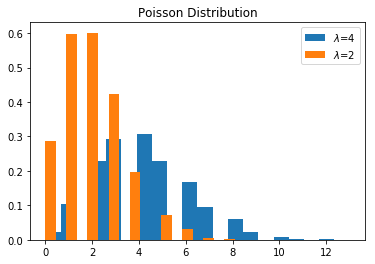

In [118]:
# Current number of typos
data = np.random.poisson(4, 5000)
plt.hist(data, bins=20, label='$\lambda$=4',density=True)

# Number of typos with the new software
data2 = np.random.poisson(2,5000)
plt.hist(data2, bins=20, label='$\lambda$=2', density=True)
plt.legend()
plt.title('Poisson Distribution')


### Normal distribution
The normal distribution refers to a family of continuous probability distributions described by the normal equation. The normal equation is the probability density function for the normal distribution.

$$p(x;\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2}\left(\frac{x - \mu}{\sigma} \right)^2}$$

The normal curve shape depends on two factors: mean and standard deviation. Its charcateristic bell-shape is defined by being symetrical to the central value (mean) and the distribution of smaller values around it.

This distribution is well-known and widely used in probabilistics.

Every normal distribution (standarised or not) follows a simple rule, accoring to which, values in the range of 1 standard deviation from the mean comprise 68.3% of the values. In the range of 2 standard deviations, 95.4%. And finally, in the range of 3 standard deviations, 99.7% of the values.

The _standard normal distribution_ is a special case with mean=0 and StDeviation=1.0

There are several methods to test if a distribution falls under the normal distribution and, thus, its characteristics can be applied for probabilistic calculations.

Disciplines such as psychology, finance, sociology, pharmacy or biology use probability calculations based on this distribution to establish the validity of their researches.

  



Text(0.5,1,'Normal distribution and Gaussian bell')

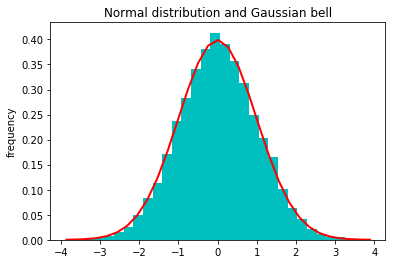

In [135]:
mu=0 #mean
sigma = 1 # standard deviation
s = np.random.normal(mu, sigma,10000)
plt.hist(s, 30, density=True, color='c')
# Applying the normal curve function and plotting (from Numpy documentation)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.ylabel('frequency')
plt.title('Normal distribution and Gaussian bell')
